In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Datasets/train.csv')
test = pd.read_csv('Datasets/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB


In [4]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
#one null value in training set
train.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
#no null values in testing set
test.isnull().sum()

x    0
y    0
dtype: int64

In [7]:
train[train['y'].isnull()]

,x,y
213,3530.157369,NaN


In [8]:
#finding maximum value in x and y in training set
train.max()

x    3530.157369
y     108.871618
dtype: float64

In [9]:
#finding minimum value in x and y in training set
train.min()

x    0.000000
y   -3.839981
dtype: float64

In [10]:
#Checking for outliers
train[train['y'] < 0]

,x,y
41,0.0,-1.286311
176,2.0,-1.053276
184,3.0,-2.830750
196,4.0,-0.936895
204,3.0,-2.235880
336,0.0,-3.836652
392,1.0,-3.839981
599,2.0,-0.121861
614,0.0,-0.764538


In [11]:
#checking for outliers
train[(train['x'] > 0) & (train['x'] < 5)]

,x,y
30,4.0,7.081323
77,4.0,2.316708
81,3.0,8.489164
127,3.0,3.574662
176,2.0,-1.053276
184,3.0,-2.830750
196,4.0,-0.936895
204,3.0,-2.235880
291,1.0,3.778210
293,4.0,9.682408


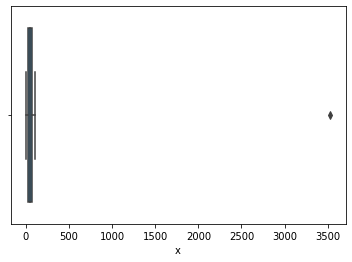

In [12]:
#Visualizing outliers
sea.boxplot(x = 'x', data = train)
#the above visualization clearly tells us that x containing value 3500 is a outlier

In [13]:
train.drop(train[train['x'] > 3500].index, inplace = True)

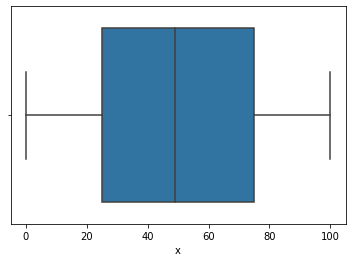

In [14]:
#now the data looks good in column x
sea.boxplot(x = 'x', data = train)

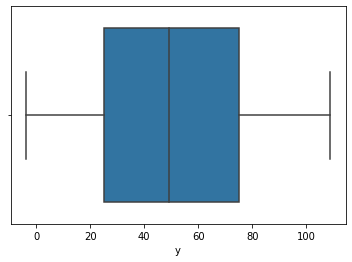

In [15]:
sea.boxplot(x = 'y', data = train)

In [16]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [17]:
train.max()

x    100.000000
y    108.871618
dtype: float64

In [18]:
train.min()

x    0.000000
y   -3.839981
dtype: float64

# Exploring test set

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


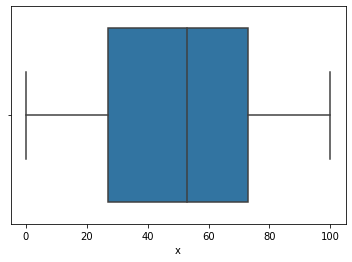

In [20]:
sea.boxplot(x = 'x', data = test)

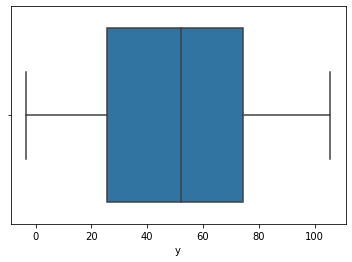

In [21]:
sea.boxplot(x = 'y', data = test)

In [22]:
X_train = train.iloc[:,:1]
X_test = test.iloc[:,:1]

In [23]:
y_train = train.iloc[:,1:3]
y_test = test.iloc[:,1:3]

In [24]:
X_train

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
5,36.0
6,12.0
7,81.0
8,25.0
9,5.0


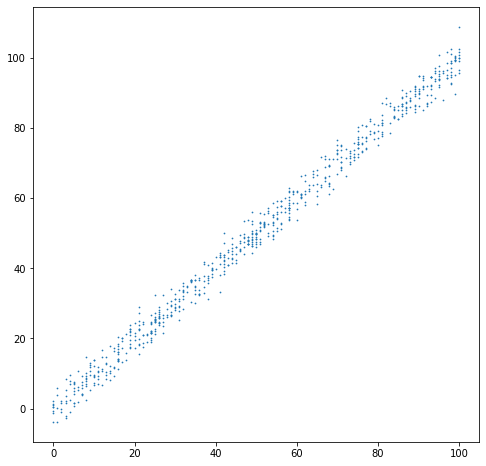

In [25]:
plt.figure(figsize = (8,8))
plt.scatter(X_train, y_train, s = 0.5)

In [26]:
x_sample = train.iloc[:3,:1]

In [27]:
x_sample

,x
0,24.0
1,50.0
2,15.0


In [28]:
y_sample = train.iloc[:3,1:3]

In [29]:
new_data = pd.DataFrame({'x':[24,50,15],'y':[21,47,17]})

In [30]:
new_data['x'].values

array([24, 50, 15])

In [31]:
y_sample

,y
0,21.549452
1,47.464463
2,17.218656


In [108]:
def grad_desc(x,y):
    b0 = 1
    b1 = 0
    m = len(x)
    epochs = 20000
    learning_rate = 0.0000001
    
    for i in range(epochs):
        y_pred = b0 + b1 * x
        cost = (1 / (2 * m)) * sum([val**2 for val in (y_pred - y)])
        b0_d = (1 / m) * sum(y_pred - y)
        b1_d = (1 / m) * (sum((y_pred - y) * x))
        b0 = b0 - (learning_rate * b0_d)
        b1 = b1 - (learning_rate * b1_d)     
        #print('b0 {},b1 {},iteration {},cost {}'.format(cost))
        #print(cost)
        
    return b0, b1
   

In [109]:
grad_desc(X_train.values,y_train.values)

(array([1.01415881]), array([0.98261947]))

In [32]:
def predict(test):
    b0 = 1.01415881
    b1 = 0.98261947
    n = len(test)
    
    lis = []
    for i in range(n):
        y_pred = b0 + b1 * test[i]
        lis.append(y_pred)
    return lis

In [33]:
y_pred = predict(X_test.values) 

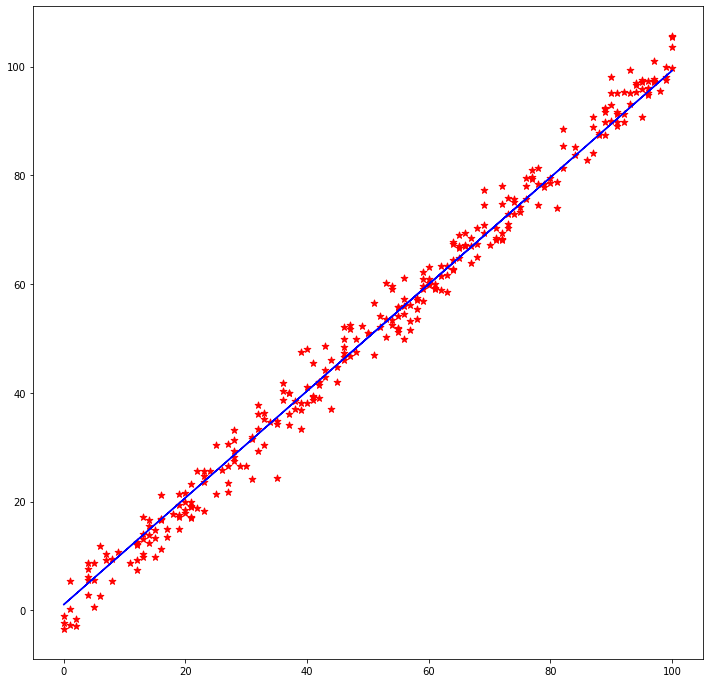

In [34]:
plt.figure(figsize = (12,12))
plt.scatter(x = X_test, y = y_test, s = 50, c = 'r', marker = '*')
plt.plot(X_test, y_pred, c = 'b')

In [35]:
rmse = np.sqrt(sum([val**2 for val in (y_pred - y_test.values)]) / len(y_test))
print('Root mean squared error is : {}'.format(rmse))

Root mean squared error is : [3.1620118]


In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(y_pred, y_test)

2.485992232843333

In [43]:
def accuracy( y_data_test, y_pred_test):
        total_error = 0 
        for i in range(0, len(y_data_test)): 
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i]) 
            total_error = (total_error / len(y_data_test)) 
            accuracy = 1 - total_error 
            return accuracy * 100 
    
    
    

In [49]:
accuracy(y_test.values, y_pred)

array([99.98704988])

# Finding regression line using Matrix 

In [37]:
theta = np.linalg.inv(np.dot(X_train.T, X_train)) * np.dot(X_train.T, y_train)

In [134]:
print(theta)

[[0.99904948]]


In [135]:
Y_pred = X_test.dot(theta)

In [136]:
rmse = np.sqrt(sum([val**2 for val in (Y_pred.values - y_test.values)]) / len(y_test))
print('Root mean squared error is : {}'.format(rmse))

Root mean squared error is : [3.07471359]


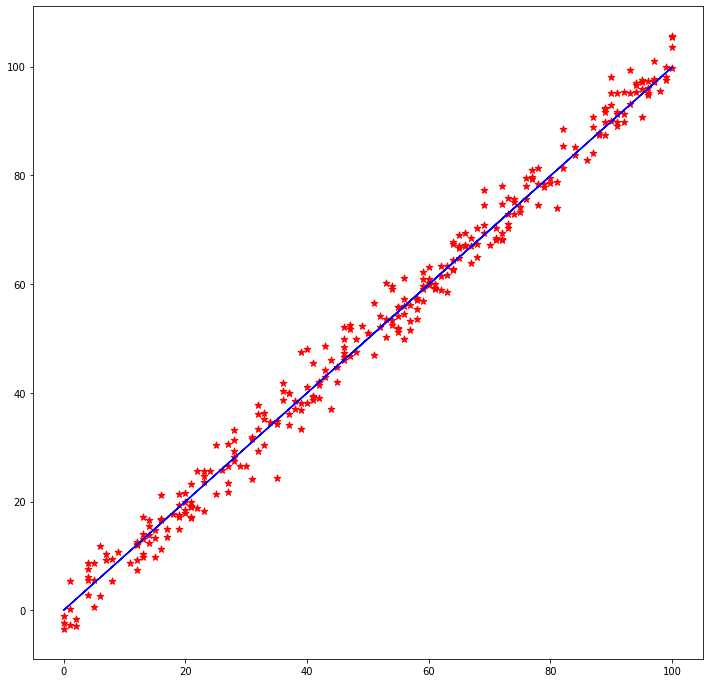

In [137]:
plt.figure(figsize = (12,12))
plt.scatter(x = X_test, y = y_test, s = 50, c = 'r', marker = '*')
plt.plot(X_test, Y_pred, c = 'b')

In [32]:
X_train.shape

(699, 1)

In [33]:
X_test.shape

(300, 1)

In [34]:
y_train.shape

(699, 1)

In [35]:
y_test.shape

(300, 1)

In [38]:
theta.shape

(1, 1)